In [1]:
import numpy as np
import xarray as xr
from modules.ADI import ADI
from modules.integrator import forward_euler_final
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation
import matplotlib.pyplot as plt


# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x*y)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)

In [2]:
diffusion = Analytic(lambda x, y: 1)
diffusion.set_partial_x(lambda x, y: 0)
diffusion.set_partial_y(lambda x, y: 0)

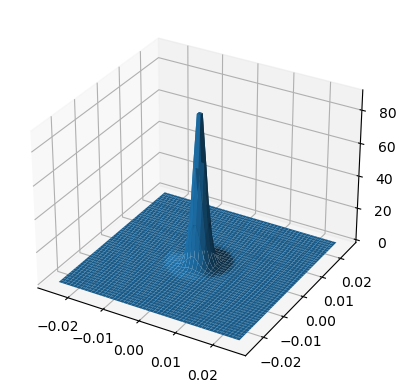

In [3]:
n_grid = 50
n_time = 400
dt = 0.0001
dx = 0.001
dy = 0.001

conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  100*np.exp(- (X**2 + Y**2)/(0.0001*dx*n_grid))
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [4]:
result_ds = forward_euler_final(conc, diffusion, initial_condition)

/Users/saituumi/Documents/GitHub/A409_SeleniumDispersion/modules/functions.py:18: RuntimeWarning: overflow encountered in divide
  deriv2 = (C.now[2:, 1:-1] - C.now[1:-1, 1:-1] + C.now[0:-2,1:-1])/C.dx**2 + (C.now[1:-1, 2:] - C.now[1:-1, 1:-1] + C.now[1:-1, 0:-2])/C.dy**2
/Users/saituumi/Documents/GitHub/A409_SeleniumDispersion/modules/functions.py:18: RuntimeWarning: overflow encountered in add
  deriv2 = (C.now[2:, 1:-1] - C.now[1:-1, 1:-1] + C.now[0:-2,1:-1])/C.dx**2 + (C.now[1:-1, 2:] - C.now[1:-1, 1:-1] + C.now[1:-1, 0:-2])/C.dy**2
/Users/saituumi/Documents/GitHub/A409_SeleniumDispersion/modules/functions.py:18: RuntimeWarning: invalid value encountered in subtract
  deriv2 = (C.now[2:, 1:-1] - C.now[1:-1, 1:-1] + C.now[0:-2,1:-1])/C.dx**2 + (C.now[1:-1, 2:] - C.now[1:-1, 1:-1] + C.now[1:-1, 0:-2])/C.dy**2
/Users/saituumi/Documents/GitHub/A409_SeleniumDispersion/modules/functions.py:18: RuntimeWarning: invalid value encountered in add
  deriv2 = (C.now[2:, 1:-1] - C.now[1:-1, 1:-1

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

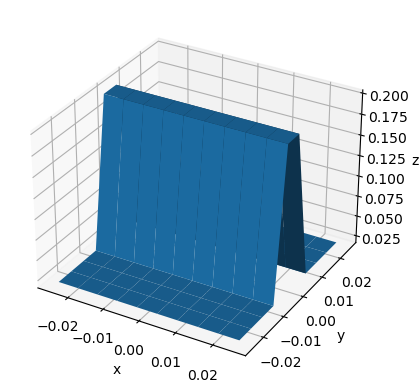

In [5]:
diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion = Interpolate(diffarr, xint, yint, s=0)

diffusion.plot_2D(func='func')

In [6]:
result_ds = forward_euler_final(conc, diffusion, initial_condition)

/Users/saituumi/Documents/GitHub/A409_SeleniumDispersion/modules/functions.py:19: RuntimeWarning: invalid value encountered in add
  deriv1 = diffusion.partial_x(array_x,array_y)*(C.now[2:, 1:-1] - C.now[0:-2,1:-1])/(2*C.dx) + diffusion.partial_y(array_x,array_y)*(C.now[1:-1, 2:] - C.now[1:-1, 0:-2 ])/(2*C.dy)
/Users/saituumi/Documents/GitHub/A409_SeleniumDispersion/modules/functions.py:21: RuntimeWarning: invalid value encountered in add
  C.next[1:-1,1:-1] = C.now[1:-1, 1:-1 ] + C.dt*(diffusion(array_x, array_y)*(deriv2) + (deriv1))
